In [1]:
import pandas as pd

# for spatial data
import geopandas as gpd

# for plotting
import matplotlib.pyplot as plt
# for basemaps
import contextily as ctx

import folium
from folium.plugins import MarkerCluster
import pandas as pd

import plotly.express as px

/opt/conda/lib/python3.9/site-packages/geopandas/_compat.py:106: UserWarning: The Shapely GEOS version (3.9.1-CAPI-1.14.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  warnings.warn(


/tmp/ipykernel_542/717520223.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['geometry'] = df['buffer_polygon'].apply(wkt.loads)


<AxesSubplot:>

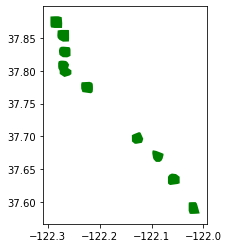

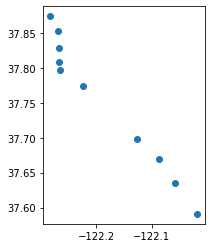

In [2]:
from shapely import wkt
stations=pd.read_csv('final_stations_walk.csv')

stationbounds=stations[['Station',
 'City',
 'Code',
 'TOD',
 'County',
 'Marker',
 'buffer_polygon']]


df=stationbounds
df['geometry'] = df['buffer_polygon'].apply(wkt.loads)
gdf = gpd.GeoDataFrame(df,crs='epsg:4326')
#gdf = gpd.GeoDataFrame(df, crs='epsg:26910')


df2=stations
df2['geometry'] = df2['geometry'].apply(wkt.loads)
gdf2 = gpd.GeoDataFrame(df2,crs='epsg:4326')
gdf.plot(color='green')

gdf2.plot()

In [3]:
df_wm2 = gdf2.to_crs(epsg=3857)
df_wm = gdf.to_crs(epsg=3857)
df_wm

,Station,City,Code,TOD,County,Marker,buffer_polygon,geometry
0,ASHBY,Berkeley,BKY,Yes,ALA,D,"POLYGON ((-122.2705249 37.8442736, -122.277355...","POLYGON ((-13611092.571 4557450.193, -13611852..."
1,MACARTHUR,Oakland,OAK,Yes,ALA,D,"POLYGON ((-122.2630119 37.820378, -122.2707559...","POLYGON ((-13610256.228 4554082.232, -13611118..."
2,HAYWARD,Hayward,HAY,Yes,ALA,D,"POLYGON ((-122.0853634 37.6611423, -122.089055...","POLYGON ((-13590480.487 4531666.562, -13590891..."
3,SOUTH HAYWARD,Hayward,HAY,Yes,ALA,D,"POLYGON ((-122.0642612 37.6259094, -122.066706...","POLYGON ((-13588131.401 4526713.315, -13588403..."
4,FRUITVALE,Oakland,OAK,Yes,ALA,D,"POLYGON ((-122.2167742 37.7656538, -122.221195...","POLYGON ((-13605109.070 4546373.245, -13605601..."
5,NORTH BERKELEY,Berkeley,BKY,No,ALA,o,"POLYGON ((-122.2865786 37.8651654, -122.291102...","POLYGON ((-13612879.661 4560395.678, -13613383..."
6,19TH STREET/OAKLAND,Oakland,OAK,No,ALA,o,"POLYGON ((-122.2732646 37.7991381, -122.275865...","POLYGON ((-13611397.553 4551089.493, -13611687..."
7,BAY FAIR,San Leandro,SAN,No,ALA,o,"POLYGON ((-122.1295769 37.6886827, -122.130019...","POLYGON ((-13595402.311 4535539.988, -13595451..."
8,UNION CITY,Union City,UNC,No,ALA,o,"POLYGON ((-122.022147 37.5818938, -122.024772 ...","POLYGON ((-13583443.270 4520528.644, -13583735..."
9,LAKE MERRITT,Oakland,OAK,No,ALA,o,"POLYGON ((-122.2678111 37.7904618, -122.275731...","POLYGON ((-13610790.472 4549867.235, -13611672..."


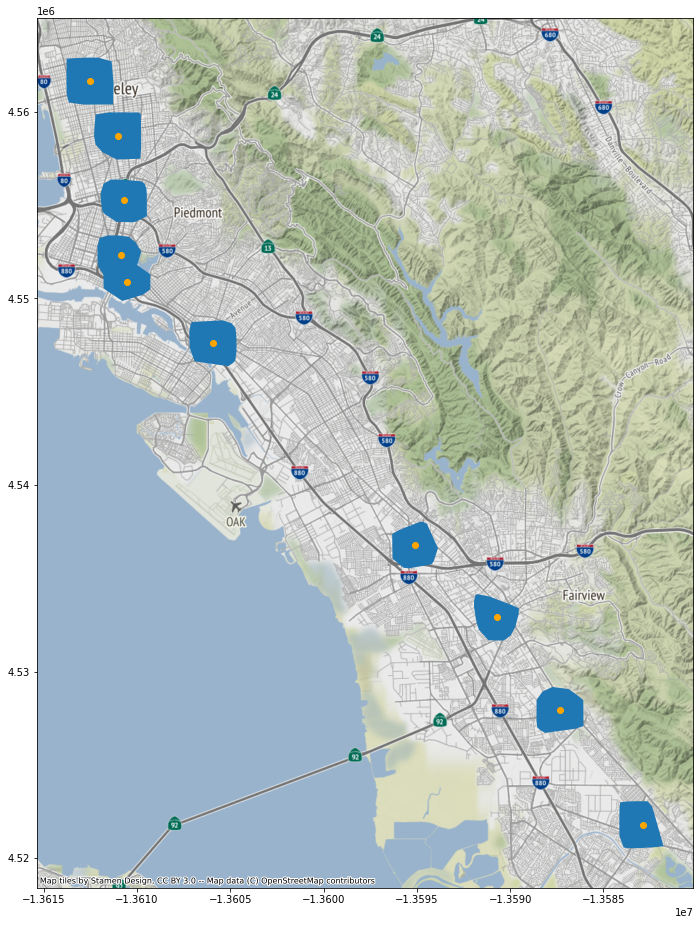

In [4]:
fig, ax = plt.subplots(figsize = (20,16)) 
df_wm.plot(ax=ax)
df_wm2.plot(color = 'Orange',ax=ax)
ctx.add_basemap(ax)

In [5]:
import pandas as pd
import geopandas as gpd
import folium
import branca.colormap as cm

x_map=gdf.centroid.x.mean()
y_map=gdf.centroid.y.mean()

mymap = folium.Map(location=[y_map, x_map], zoom_start=11,tiles=None)
folium.TileLayer('cartodbdark_matter',control=False).add_to(mymap)



style_function = lambda x: {'fillColor':'Red' if x['properties']['TOD']=='No' else 'Green',
                            'color':'#000000', 
                            'fillOpacity': 0.5, 
                            'weight': 0.1}

highlight_function = lambda x: {'fillColor': '#000000', 
                                'color':'#000000', 
                                'fillOpacity': 0.50, 
                                'weight': 0.1}
NIL = folium.features.GeoJson(
    gdf2,
    style_function=style_function, 
    control=True,
    highlight_function=highlight_function, 
    tooltip=folium.features.GeoJsonTooltip(
        fields=['Station', 'City', 'Code', 'TOD', 'County'],
        style=("background-color: white; color: #333333; font-family: arial; font-size: 12px; padding: 10px;") 
    )
)

NIL2 = folium.features.GeoJson(
    gdf,
    
    style_function=style_function, 
    control=False,
    highlight_function=highlight_function, 
    tooltip=folium.features.GeoJsonTooltip(
        fields=['Station', 'City', 'Code', 'TOD', 'County'],
        style=("background-color: white; color: #333333; font-family: arial; font-size: 12px; padding: 10px;'fillColor': 'orange'") 
    )
)

mymap.add_child(NIL)
mymap.add_child(NIL2)

mymap.keep_in_front(NIL)

folium.TileLayer('cartodbdark_matter').add_to(mymap)
folium.TileLayer('cartodbpositron').add_to(mymap)
folium.TileLayer('stamentoner').add_to(mymap)

folium.LayerControl().add_to(mymap)

mymap.save('station_buffer.html')
mymap

/tmp/ipykernel_542/3034855895.py:6: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  x_map=gdf.centroid.x.mean()
/tmp/ipykernel_542/3034855895.py:7: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  y_map=gdf.centroid.y.mean()
